<h1><center>PyGol meets scikit-learn</center></h1>
<p>
This sheet demonstrates the usage  PyGol, an ILP system,  on a typical data science dataset(Tabular, CSV). PyGol is an ILP solution for <b><font color="red">automated machine learning and automated data science</font></b>. PyGol can be considered an <b><font color="red">Explainable learning</font></b> engine to the machine learning community. 
</p>
<p>
The need for in-depth knowledge to work with ILP algorithms, is
one of the disadvantages of most ILP systems from the data science perspective.
For example, Progol, Aleph and Metagol are well-known ILP systems, but they
cannot be used without user-defined mode declarations or meta-rules. The user
needs to have domain/data information to represent the problem and background
knowledge in logical representation, converting data into the correct format and
also define the right mode declaration or meta-rules, etc.</p>

## Load PyGol

In [1]:
import sys
sys.path.insert(0, '../../')
from pygol import *

## Load sklearn modules and other modules

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn import  svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load dataset into pandas dataframe

In [3]:
cancer = load_breast_cancer()
data = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

## Preparing Data and Targes for learning

In [4]:
## Selecting Feature Columns for PyGol
feature_col=data.columns[0:-1]

## Selecting Target Columns for PyGol
target=data.columns[-1]

##Selecting data and target for other machine learning algorithms
X = data.values[:,0:-1]
y = data.values[:,-1]

## PyGol data preprocessing

### 1.  Generate first-order logic rules as background knowledge for PyGol by deciding on grouping.

In [5]:
background=prepare_logic_rules(data,feature_col, meta_information="meta_data.info", default_div=4, conditions={})

<font color="red">This function will generate a file, <b>"meta_data.info"</b>,  containing meta-information about the dataset and grouping.</font>

### 2. Generate Examples files

In [6]:
examples=prepare_examples(data,target)

<font color="red">ILP needs positive and negative examples for learning by the definition itself. If it's a multi-class classification, we must combine or alter the files according to meta-information. We create an example list automatically using the meta-information generated in the previous step.</font>

### 3. Generate Constant list

In [7]:
const=read_constants_meta_info()

### 4. Generate Bottom Clause

In [8]:
P, N = bottom_clause_generation(file="BK.pl", constant_set = const,  container = "dict",
                                positive_example="pos_example.f", negative_example="neg_example.n")

100%|██████████| 357/357 [00:01<00:00, 204.15it/s]


## Training and Test split for PyGol

In [9]:
Train_P, Test_P, Train_N, Test_N=pygol_train_test_split(test_size=0.50, 
                                                        positive_file_dictionary=P,
                                                        negative_file_dictionary=N)

## Modelling using PyGol

In [10]:
model= pygol_auto_learn(Train_P, Train_N, max_literals=2, exact_literals=True, 
                    key_size=1, min_pos=20, max_neg=0)

100%|██████████| 178/178 [00:00<00:00, 748.04it/s]

5422
+----------+ Training +----------+
['target(A):-worst_perimeter(A,g3),worst_area(A,g3)', 'target(A):-mean_radius(A,g2),worst_symmetry(A,g3)', 'target(A):-mean_area(A,g3),worst_fractal_dimension(A,g3)', 'target(A):-worst_area(A,g2),worst_concave_points(A,g3)', 'target(A):-texture_error(A,g2),worst_area(A,g3)', 'target(A):-mean_texture(A,g3),mean_perimeter(A,g3)', 'target(A):-worst_area(A,g2),worst_symmetry(A,g3)', 'target(A):-smoothness_error(A,g1),worst_area(A,g3)', 'target(A):-mean_texture(A,g3),radius_error(A,g3)', 'target(A):-radius_error(A,g3),worst_smoothness(A,g3)', 'target(A):-worst_texture(A,g2),worst_concave_points(A,g3)']
+---------------------+------------------+------------------+
|       n = 284       | Positive(Actual) | Negative(Actual) |
+=====================+==================+==================+
| Positive(Predicted) | 95               | 0                |
+---------------------+------------------+------------------+
| Negative(Predicted) | 11               | 17

## Testing on model

In [11]:
metrics=evaluate_theory_prolog(model.hypothesis,"BK.pl",Test_P, Test_N)

+----------+ Testing +----------+
+---------------------+------------------+------------------+
|       n = 285       | Positive(Actual) | Negative(Actual) |
+=====================+==================+==================+
| Positive(Predicted) | 98               | 8                |
+---------------------+------------------+------------------+
| Negative(Predicted) | 8                | 171              |
+---------------------+------------------+------------------+
+-------------+-------+
|   Metric    |   #   |
+=============+=======+
| Accuracy    | 0.944 |
+-------------+-------+
| Precision   | 0.925 |
+-------------+-------+
| Sensitivity | 0.925 |
+-------------+-------+
| Specificity | 0.955 |
+-------------+-------+
| F1 Score    | 0.925 |
+-------------+-------+


## Training and Test split for typical machine learning

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

## Modelling with out any optimization

In [13]:
from sklearn.metrics import classification_report
DT = DecisionTreeClassifier().fit(X_train, y_train)
report_DT = classification_report(y_true=y_test, y_pred=DT.predict(X_test), 
                               output_dict=True)


NB = GaussianNB().fit(X_train, y_train)
report_NB = classification_report(y_true=y_test, y_pred=NB.predict(X_test), 
                               output_dict=True)

svm1 = svm.SVC().fit(X_train, y_train)
report_svm = classification_report(y_true=y_test, y_pred=svm1.predict(X_test), 
                               output_dict=True)

per = Perceptron().fit(X_train, y_train)
report_per = classification_report(y_true=y_test, y_pred=per.predict(X_test), 
                               output_dict=True)

mlp = MLPClassifier().fit(X_train, y_train)

report_mlp = classification_report(y_true=y_test, y_pred=mlp.predict(X_test), 
                               output_dict=True)

DT_1=[report_DT['accuracy'],report_DT['macro avg']['precision'], 
      report_DT['macro avg']['recall'],  report_DT['macro avg']['f1-score']]
svm_1=[report_svm['accuracy'],report_svm['macro avg']['precision'], 
      report_svm['macro avg']['recall'],  report_svm['macro avg']['f1-score']]
NB_1=[report_NB['accuracy'],report_NB['macro avg']['precision'], 
      report_NB['macro avg']['recall'],  report_NB['macro avg']['f1-score']]
per_1=[report_per['accuracy'],report_per['macro avg']['precision'], 
      report_per['macro avg']['recall'],  report_per['macro avg']['f1-score']]
mlp_1=[report_mlp['accuracy'],report_mlp['macro avg']['precision'], 
      report_mlp['macro avg']['recall'],  report_mlp['macro avg']['f1-score']]

/home/dany/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
pygol=[metrics.accuracy, metrics.precision, metrics.sensitivity, metrics.fscore]

## Over all Peromance Comparison

<Figure size 900x600 with 0 Axes>

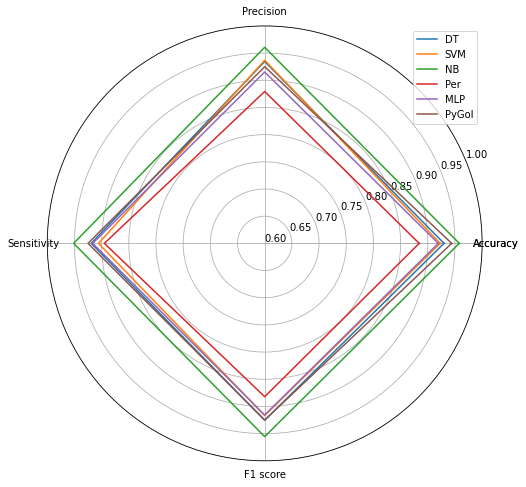

In [15]:
import numpy as np
import matplotlib.pyplot as plt


categories = ['Accuracy', 'Precision', 'Sensitivity', 'F1 score']
categories = [*categories, categories[0]]


DT_1 = [*DT_1, DT_1[0]]
svm_1 = [*svm_1, svm_1[0]]
NB_1 = [*NB_1, NB_1[0]]
per_1 = [*per_1, per_1[0]]
mlp_1 = [*mlp_1, mlp_1[0]]
pygol = [*pygol, pygol[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(DT_1))
fig = pyplot.figure(dpi=150)
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, DT_1, label='DT')
plt.plot(label_loc, svm_1, label='SVM')
plt.plot(label_loc, NB_1, label='NB')
plt.plot(label_loc, per_1, label='Per')
plt.plot(label_loc, mlp_1, label='MLP')
plt.plot(label_loc, pygol, label='PyGol')
plt.ylim(0.6, 1)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()
plt.show()